<h1 style="text-align: center;">TF2202 Teknik Komputasi - Persamaan Diferensial Biasa</h1>
<h3 style="text-align: center;">Fadjar Fathurrahman</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")
%matplotlib inline

In [3]:
import matplotlib
matplotlib.style.use("default")
#matplotlib.style.use("dark_background")

In [4]:
import scipy.integrate

Dalam notebook ini akan diberikan implementasi sederhana dari beberapa metode yang dapat digunakan untuk menyelesaikan persamaan diferensial biasa.

Bentuk umum dari persamaan diferensial biasa orde 1 adalah:

$$
y' = \frac{\mathrm{d}y}{\mathrm{d}x} = f(x,y)
$$

Solusi dari persamaan ini memiliki satu konstanta sembarang. Konstanta ini dapat ditentukan nilainya jika diberikan nilai $y$ pada suatu titik, misalnya $y(a) = \alpha$.

Persamaan diferensial biasa orde $n$ dapat dituliskan sebagai:

$$
y^{(n)} = \frac{\mathrm{d}^n y}{\mathrm{d}x^n} = f\left(x,y,y',\ldots,y^{(n-1)}\right)
$$

Dengan menggunakan notasi $y_0 = y$, $y_1 = y'$, $y_2 = y''$, $\ldots$, $y_{n-1} = y^{(n-1)}$, persamaan diferensial biasa orde $n$ dapat diubah menjadi persamaan diferensial oder satu sebagai berikut:

$$
\begin{align*}
y'_{0} &= y_{1} \\
y'_{1} &= y_{2} \\
y'_{2} &= y_{3} \\
\cdots & = \cdots \\
y'_{n} &= f\left(x,y_{0},y_{1},\ldots,y_{n-1}\right)
\end{align*}
$$

# Metode Euler

In [5]:
def ode_euler(f, xi, xf, y0, N, verbose=False):
    
    h = (xf - xi)/N
    
    if verbose:
        print("ode_euler h = %18.10f\n" % (h))
    
    xsol = xi + np.arange(0,N+1)*h
    
    # orde dari ODE ditentukan dari jumlah syarat awal yang diberikan
    Ndim = len(y0)
    
    # array untuk solusi
    ysol = np.zeros((N+1,Ndim))
    
    # aplikasi syarat awal
    ysol[0,:] = y0[:]
    
    for i in range(N):
        ysol[i+1,:] = ysol[i,:] + h*f(xsol[i], ysol[i,:])
    
    return xsol, ysol

### Contoh 1

Cari solusi dari persamaan diferensial:

$$
y' + 4y = x^2
$$

pada rentang $x$ $[0,1]$ dengan syarat awal $y(0) = 1$. Bandingkan hasil yang diperoleh dengan solusi analitik:

$$
y = \frac{31}{32}e^{-4x} + \frac{1}{4}x^2 - \frac{1}{8}x + \frac{1}{32}
$$

Ubah persamaan menjadi bentuk standar $y' = f(x,y)$

$$
y' = x^2 - 4y
$$

sehingga $f(x,y) = x^2 - 4y$

In [6]:
def my_ode_problem_01(x,y):
    return x**2 - 4*y

xi = 0.0
xf = 1.0
y0 = [1.0]  # syarat batas dalam bentuk list
Ninterval = 50
xsol, ysol = ode_euler(my_ode_problem_01, xi, xf, y0, Ninterval, verbose=True)

ode_euler h =       0.0200000000



In [8]:
def analytic_sol_01(x):
    return (31.0/32.0)*np.exp(-4*x) + x**2/4 - x/8 + 1.0/32.0

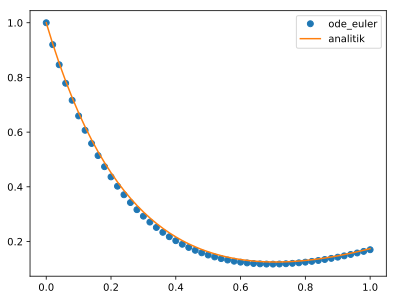

In [9]:
plt.clf()
plt.plot(xsol, ysol[:,0], label="ode_euler", marker="o", linewidth=0)
plt.plot(xsol, analytic_sol_01(xsol), label="analitik")
plt.legend();

### Contoh 2

Selesaikan persamaan diferensial berikut:

$$
y'' = -0.1y' - x
$$

pada $x = 0$ sampai dengan 2 dengan syarat awal $y(0) = 0$ dan $y'(0) = 1$ dengan menggunakan ukuran langkah $h = 0.05$.

Bandingkan dengan solusi analitik:

$$
y = 100x - 5x^2 + 990\left( e^{-0.1x} - 1 \right)
$$

In [10]:
def my_ode_problem_02(x, y):
    f = np.zeros(2)
    f[0] = y[1]
    f[1] = -0.1*y[1] - x
    return f

In [11]:
def analytic_sol_02(x):
    return 100*x - 5*x**2 + 990*(np.exp(-0.1*x) -1)

In [12]:
xi = 0.0
xf = 2.0
y0 = [0.0, 1.0]
h = 0.05
Ninterval = int( (xf - xi)/h )
xsol, ysol = ode_euler(my_ode_problem_02, xi, xf, y0, Ninterval, verbose=True)

ode_euler h =       0.0500000000



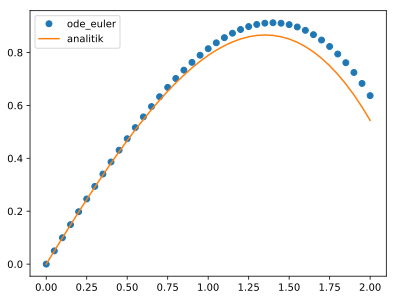

In [13]:
plt.clf()
plt.plot(xsol, ysol[:,0], label="ode_euler", marker="o", linewidth=0)
plt.plot(xsol, analytic_sol_02(xsol), label="analitik")
plt.legend();

# Metode Runge-Kutta orde 4

In [15]:
def ode_RK4(f, xi, xf, y0, N, verbose=False):
    
    h = (xf - xi)/N
    
    if verbose:
        print("ode_RK4 h = %18.10f\n" % (h))
    
    xsol = xi + np.arange(0,N+1)*h
    
    # orde dari ODE ditentukan dari jumlah syarat awal yang diberikan
    Ndim = len(y0)
    
    # array untuk solusi
    ysol = np.zeros((N+1,Ndim))
    
    # aplikasi syarat awal
    ysol[0,:] = y0[:]
    
    for i in range(N):
        f1 = h*f( xsol[i], ysol[i,:] )
        f2 = h*f( xsol[i] + h/2, ysol[i,:] + f1/2 )
        f3 = h*f( xsol[i] + h/2, ysol[i,:] + f2/2 )
        f4 = h*f( xsol[i] + h, ysol[i,:] + f3 )
        ysol[i+1,:] = ysol[i,:] + (f1 + 2*(f2 + f3) + f4)/6
    
    return xsol, ysol

### Contoh

In [16]:
xi = 0.0
xf = 2.0
y0 = [0.0, 1.0]
h = 0.05
Ninterval = int( (xf - xi)/h )
xsol, ysol = ode_RK4(my_ode_problem_02, xi, xf, y0, Ninterval, verbose=True)

ode_RK4 h =       0.0500000000



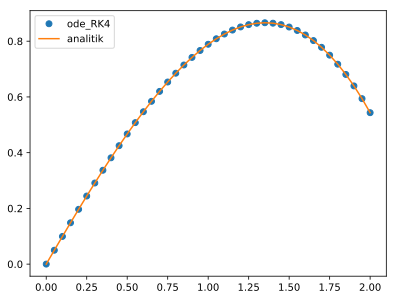

In [17]:
plt.clf()
plt.plot(xsol, ysol[:,0], label="ode_RK4", marker="o", linewidth=0)
plt.plot(xsol, analytic_sol_02(xsol), label="analitik")
plt.legend();

# Latihan soal di slide

In [29]:
def soal_slide_no15(x, y):
    return -2*x**3 + 12*x**2 - 20*x + 8.5

In [28]:
def soal_slide_no15_analitik(x):
    return -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

In [30]:
xi = 0.0
xf = 4.0
y0 = [1.0] # syarat awal
h = 0.5
Ninterval = int( (xf - xi)/h )
xsol, ysol = ode_euler(soal_slide_no15, xi, xf, y0, Ninterval, verbose=True)

ode_euler h =       0.5000000000



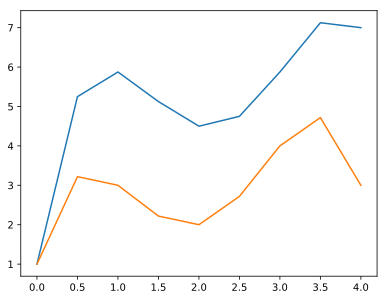

In [31]:
plt.clf()
plt.plot(xsol, ysol)
plt.plot(xsol, soal_slide_no15_analitik(xsol))

Text(0.5, 1.0, 'Menggunakan ode_euler')

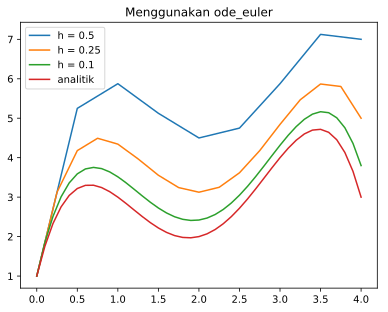

In [34]:
xi = 0.0
xf = 4.0
y0 = [1.0] # syarat awal
hh = [0.5, 0.25, 0.1]

plt.clf()
for h in hh:
    Ninterval = int( (xf - xi)/h )
    xsol, ysol = ode_euler(soal_slide_no15, xi, xf, y0, Ninterval)
    plt.plot(xsol, ysol, label="h = "+str(h))
plt.plot(xsol, soal_slide_no15_analitik(xsol), label="analitik")
plt.legend()
plt.title("Menggunakan ode_euler")

Text(0.5, 1.0, 'Menggunakan ode_RK4')

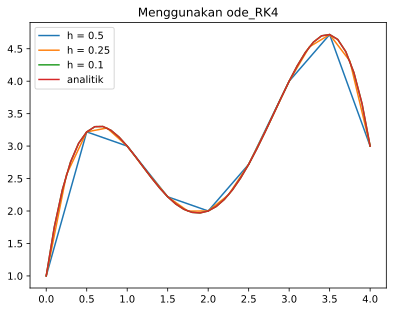

In [35]:
xi = 0.0
xf = 4.0
y0 = [1.0] # syarat awal
hh = [0.5, 0.25, 0.1]

plt.clf()
for h in hh:
    Ninterval = int( (xf - xi)/h )
    xsol, ysol = ode_RK4(soal_slide_no15, xi, xf, y0, Ninterval)
    plt.plot(xsol, ysol, label="h = "+str(h))
plt.plot(xsol, soal_slide_no15_analitik(xsol), label="analitik")
plt.legend()
plt.title("Menggunakan ode_RK4")

In [45]:
def soal_slide_no34(x, y):
    f = np.zeros(2)
    f[0] = y[1]
    f[1] = -10.0
    return f

In [49]:
h = 0.1
xi = 0.0
xf = 100.0
y0 = [0.0, 100.0]
Ninterval = int( (xf - xi)/h )
xsol, ysol = ode_RK4(soal_slide_no34, xi, xf, y0, Ninterval, verbose=True)

ode_RK4 h =       0.1000000000



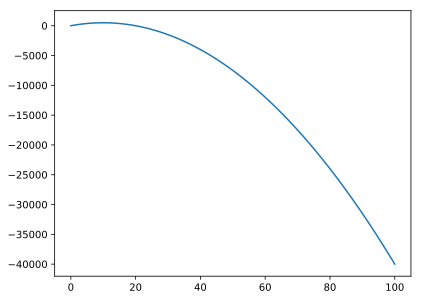

In [51]:
plt.clf()
plt.plot(xsol, ysol[:,0])